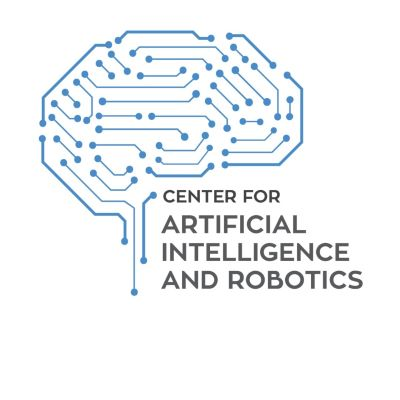

# K Means Clustering Project 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

<div style="font-size: 14px;">
    1. The specifications of the dataset used for this exercise, which has been collected from several universities with 18 different features, are as follows:
<div style="font-size: 14px;">
    2. The ultimate goal is to determine whether a university is private or public based on the features we have.
<div style="font-size: 14px;">
    3. Note that this data is stored in the Private column, but we do not want to use it for training the model; we will only use it for the final evaluation.

* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Get the Data

<div style="font-size:14px;">
    Reading the dataset while ensuring that the first column is used as the index.

In [7]:
df = pd.read_csv('College_Data',index_col=0)

In [9]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


<div style="font-size:14px;">
    Taking a quick overview of the dataset and displaying its general statistical information.

In [10]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [12]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


---

---

---

## Exploratory Data Analysis (EDA)

<div style="font-size:14px;">
    Now, let's explore the dataset (exploratory analysis) to see what insights we can uncover.

<div style="font-size:14px;">
    Plotting a scatter plot of Grad.Rate against Room.Board, where the data points are distinguished based on the Private column.

In [16]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Room.Board', ylabel='Grad.Rate'>

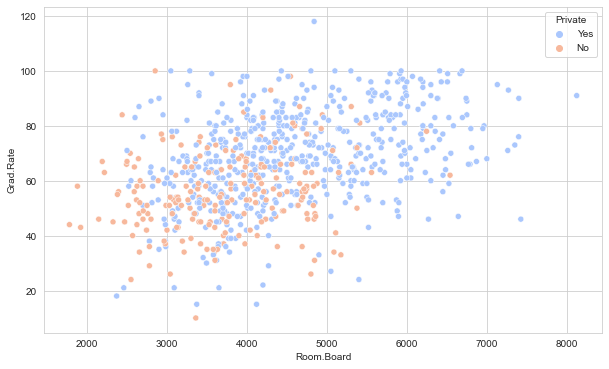

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Room.Board'], y=df['Grad.Rate'], hue=df['Private'], palette='coolwarm')
# plt.legend(title="Private", loc="upper right", bbox_to_anchor=(1, 1))

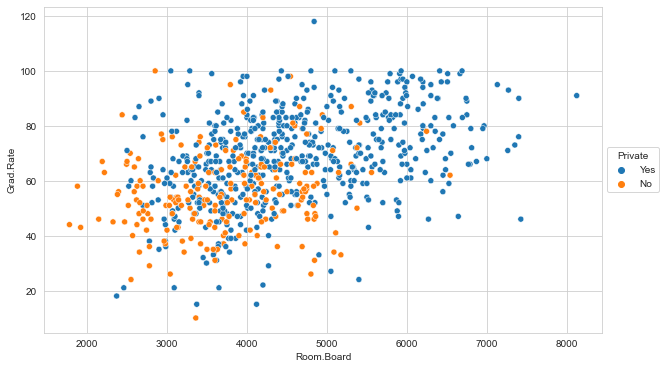

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Room.Board'], y=df['Grad.Rate'], hue=df['Private'])
plt.legend(title="Private", loc="center left", bbox_to_anchor=(1, 0.5))

C:\Users\Amin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


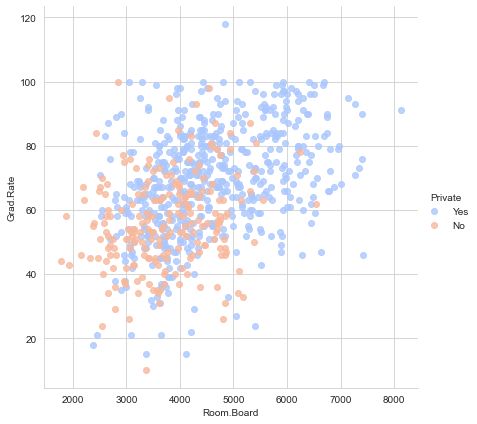

In [38]:
sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=df,hue='Private',height=6,aspect=1,palette='coolwarm',fit_reg=False)

---

<div style="font-size:15px;">
    Plotting a scatter plot of F.Undergrad against Outstate, where the data points are distinguished based on the Private column.

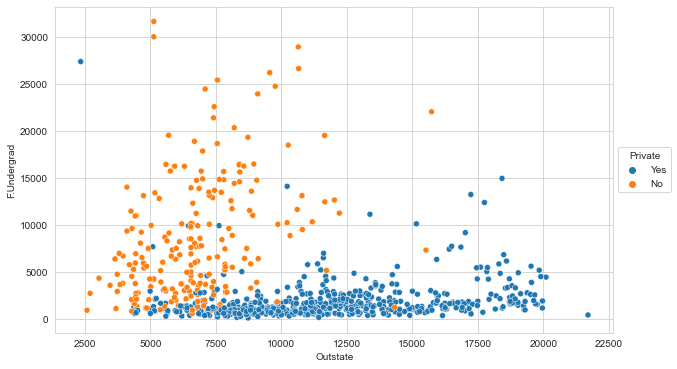

In [43]:
plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(x=df['Outstate'], y=df['F.Undergrad'], hue=df['Private'])

# Move the legend outside the plot
plt.legend(title="Private", loc="center left", bbox_to_anchor=(1, 0.5))

In [45]:
df.to_csv("College_Data2.csv", index=True)

C:\Users\Amin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


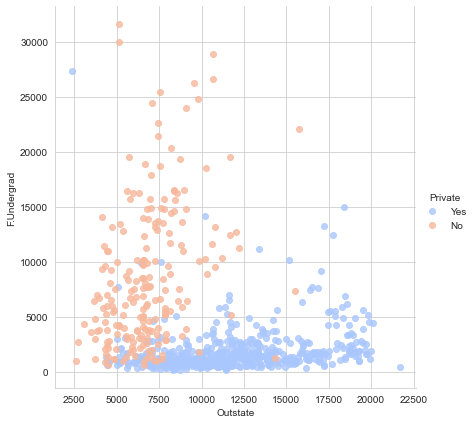

In [46]:
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=df,hue='Private',height=6,aspect=1,palette='coolwarm',fit_reg=False)

---

<div style="font-size:15px;">
    Trying to plot a histogram of Outstate, separated by the Private column, using FacetGrid.

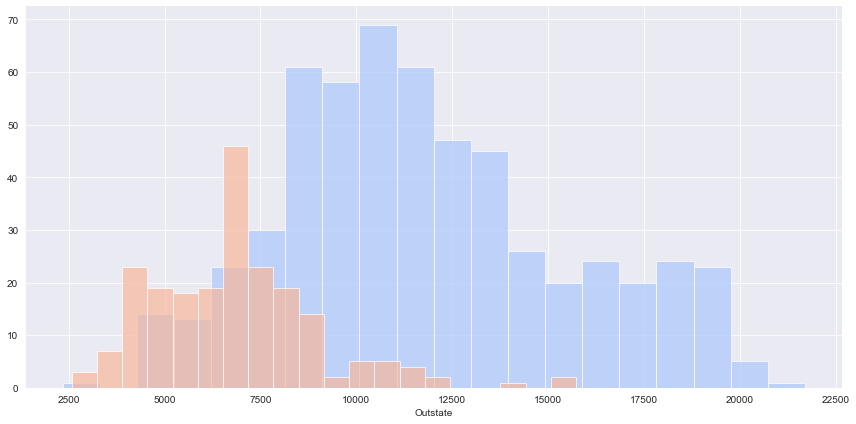

In [58]:
sns.set_style('darkgrid')
facet = sns.FacetGrid(df, hue='Private', palette='coolwarm', height=6, aspect=2)
facet = facet.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

<div style="direction:rtl">
سعی کنید به کمک Facet Grid، نمودار هیستوگرام Grad.Rate را به تفکیک ستون Private رسم کنید.
<div style="direction:rtl">
اگر نتوانستید با Facet Grid این کار را بکنید، با رسم دو نمودار در یک صفحه این کار را انجام دهید.

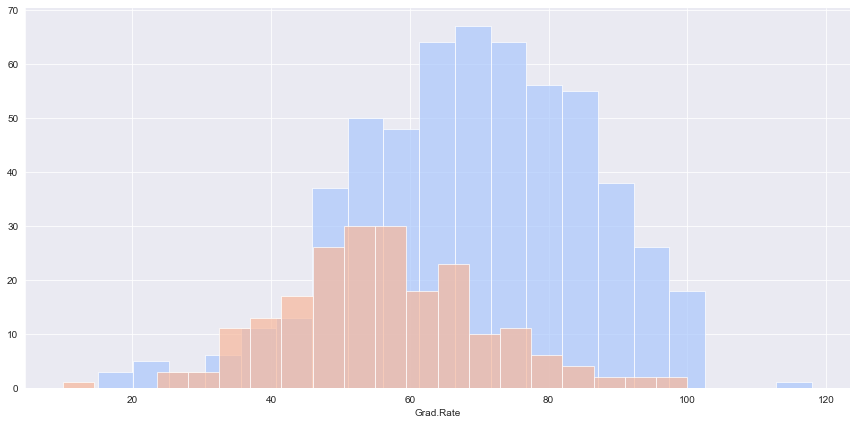

In [61]:
# sns.set_style('darkgird')
facet = sns.FacetGrid(df, hue='Private', palette='coolwarm', height=6, aspect=2)
facet = facet.map(plt.hist, 'Grad.Rate', bins=20, alpha=.7)

<div style="font-size:15px;">
    It looks like a university's graduation rate has exceeded 100! Let's Find this data point.

In [65]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


<div style="direction:rtl">
این داده را از 120 تبدیل به 100 نمایید و دوباره هیستوگرام را ترسیم کنید.
<div style="direction:rtl">
ممکن است به علت این که در حال تغییرات روی دیتاست اصلی هستید، وارنینگی دریافت کنید که جای نگرانی نیست.

In [66]:
df.loc['Cazenovia College','Grad.Rate'] = 100

In [72]:
df.loc[["Cazenovia College"]]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,100


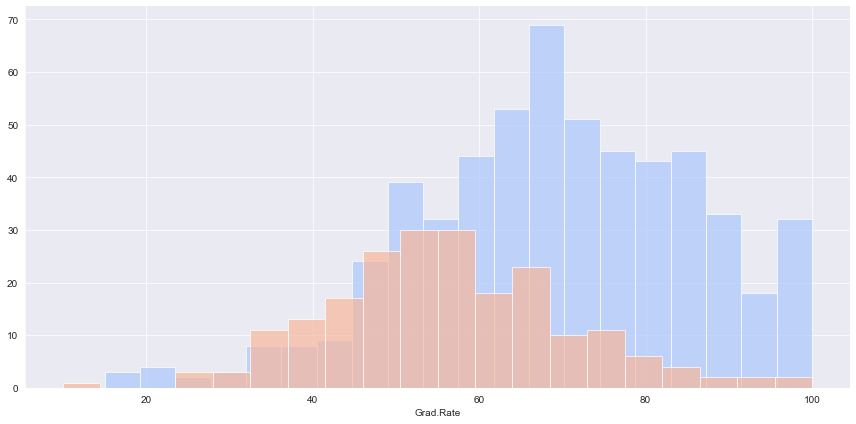

In [73]:
# sns.set_style('darkgird')
facet = sns.FacetGrid(df, hue='Private', palette='coolwarm', height=6, aspect=2)
facet = facet.map(plt.hist, 'Grad.Rate', bins=20, alpha=.7)

---

---

---

## K Means Cluster Creation

In [74]:
from sklearn.cluster import KMeans

<div style="font-size:14px">
    Now it's time to train our unsupervised model on the data without letting it see the actual labels. We'll ask it to classify the universities into two groups (public and private) based on different features.

In [75]:
kmeans = KMeans(n_clusters=2)

In [76]:
kmeans.fit(df.drop('Private', axis=1))

KMeans(n_clusters=2)

## Cluster Centroids

In [77]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

## Evaluation

<div style="font-size:15px;">
    In general, apart from the Silhouette Score, we don't have a specific method for evaluating an unsupervised model. However, in this example, we kept the labels in advance so that we can use them to evaluate our model at this stage.

<div style="font-size:15px;">
    First, let's print the predicted clusters.

In [80]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<div style="font-size:15px;">
    As we can see, the data has been divided into two clusters: 0 and 1. Now, let's write a function that converts the Private column into a 0 and 1 format so that we can evaluate our model using the metrics you already know.

In [82]:
df['Private'] = df['Private'].map({'Yes': 1, 'No': 0})

In [85]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


<div style="font-size:15px;">
    Now, let's apply the same evaluation metrics we already know, except for score, which doesn't make sense here. Instead of using the label column, we use the Private column, and instead of the predicted labels, we use the cluster assignments provided by K-Means.

In [91]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Potential Issue: Cluster Labels Might Be Flipped

<div style="font-size:15px;">
    Since K-Means assigns cluster numbers arbitrarily, Cluster 0 may correspond to Private or Public—we don’t know for sure. If the labels seem reversed, we may need to swap 0s and 1s in kmeans.labels_

If we want to automatically choose the best-matching cluster assignment, we should compare both versions and keep the one with higher accuracy:

In [96]:
acc1 = accuracy_score(df["Private"], kmeans.labels_)
acc2 = accuracy_score(df["Private"], 1 - kmeans.labels_)

In [97]:
# Choose the best match
best_labels = kmeans.labels_ if acc1 > acc2 else 1 - kmeans.labels_

In [89]:
print(confusion_matrix(df['Private'], kmeans.labels_))

[[ 74 138]
 [ 34 531]]


In [90]:
print(classification_report(df['Private'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [92]:
accuracy_score(df["Private"], kmeans.labels_)

0.7786357786357786

In [94]:
accuracy_score(df["Private"], 1 - kmeans.labels_)

0.22136422136422138

---

<div style="font-size:15px;">
    This result was obtained without scaling. However, as we know, algorithms like K-Means perform best when the data is scaled, as they rely on distance calculations. Now, let's scale our data and evaluate whether the results improve.

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()
scaler.fit(df.drop(['Private'], axis=1))

StandardScaler()

In [102]:
data_scaled = scaler.transform(df.drop(['Private'],axis=1))

In [105]:
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [106]:
acc1 = accuracy_score(df["Private"], kmeans.labels_)
acc2 = accuracy_score(df["Private"], 1 - kmeans.labels_)

In [108]:
best_labels = kmeans.labels_ if acc1 > acc2 else 1 - kmeans.labels_

In [110]:
print(confusion_matrix(df['Private'], best_labels))

[[ 66 146]
 [225 340]]


In [111]:
print(classification_report(df['Private'], best_labels))

              precision    recall  f1-score   support

           0       0.23      0.31      0.26       212
           1       0.70      0.60      0.65       565

    accuracy                           0.52       777
   macro avg       0.46      0.46      0.45       777
weighted avg       0.57      0.52      0.54       777



In [113]:
accuracy_score(df["Private"], best_labels)

0.5225225225225225

<div style="font-size:15px;">
    With scaling, the accuracy dropped significantly (52.25% accuracy), suggesting that in this specific dataset, the raw feature values might have provided better separation for clustering.

---

<div style="font-size:15px;">
    Now, using the Silhouette Score, we evaluate how many clusters would be optimal if we aimed for a more precise classification of universities.

In [114]:
from sklearn.metrics import silhouette_score

In [117]:
silhouette_scores = {}
for k in range(2, 11):  # Checking K values from 2 to 10
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_test.fit(data_scaled)  # Using scaled data for silhouette analysis
    score = silhouette_score(data_scaled, kmeans_test.labels_)
    silhouette_scores[k] = score

In [118]:
silhouette_df = pd.DataFrame(list(silhouette_scores.items()), columns=["Number of Clusters (K)", "Silhouette Score"])

In [121]:
silhouette_df

,Number of Clusters (K),Silhouette Score
0,2,0.228663
1,3,0.242265
2,4,0.183165
3,5,0.178445
4,6,0.162635
5,7,0.146948
6,8,0.123409
7,9,0.121272
8,10,0.134635


NO.Clusters : 2   ,Silhouette Score : 0.297
NO.Clusters : 3   ,Silhouette Score : 0.318
NO.Clusters : 4   ,Silhouette Score : 0.213
NO.Clusters : 5   ,Silhouette Score : 0.199
NO.Clusters : 6   ,Silhouette Score : 0.118
NO.Clusters : 7   ,Silhouette Score : 0.11
NO.Clusters : 8   ,Silhouette Score : 0.079
NO.Clusters : 9   ,Silhouette Score : 0.072
NO.Clusters : 10   ,Silhouette Score : 0.067


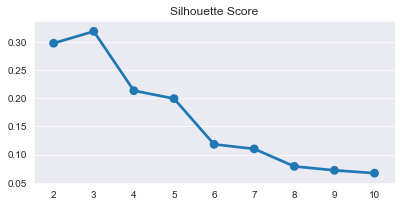

<div style="direction:rtl">
خب می بینیم که تعداد کلاستر 6 رو میتونیم به عنوان نقطه ی آرنج در نظر بگیریم و این نقطه جاییه که شیب کاهش اسکور از اونجا به بعد کمتر و ملایم میشه. این یعنی اگه صرف دولتی یا خصوصی بودن دانشکاه ها ملاک نباشه، دانشگاه های این دیتاست رو میشه به 6 دسته ی مختلف تقسیم کرد که توی هر دسته، دانشگاه های اون دسته ویژگی های مشابه به هم و متفاوت از دانشگاه های دسته های دیکه دارند.

---